<a href="https://colab.research.google.com/github/martykihn/xmas_movies_analysis/blob/main/newtests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/TextFiles

/content/drive/MyDrive/Colab Notebooks/TextFiles


In [ ]:
ls t*

text_as_list.csv               text_as_string_train.csv
text_as_list_test.csv          text_newlines_original_2.txt
text_as_list_test_TOKENS.txt   text_newlines_original.txt
text_as_list_train.csv         text_newlines.txt
text_as_list_train_TOKENS.txt  text_nopunc.txt
text_as_string_test.csv        text.txt

transformers:
CODE_OF_CONDUCT.md  hubconf.py   model_cards/    setup.cfg   utils/
CONTRIBUTING.md     ISSUES.md    notebooks/      setup.py    valohai.yaml
docker/             LICENSE      pyproject.toml  src/
docs/               Makefile     README.md       templates/
examples/           MANIFEST.in  scripts/        tests/


In [ ]:
plots = []
with open('/content/drive/MyDrive/Colab Notebooks/TextFiles/text_newlines_original_2.txt') as myfile:
  for plot in myfile:
    plot = plot.replace('\n', '')
    if plot == '':
      continue
    else:
      plots.append(str(plot))
myfile.close()

In [ ]:
type(plots), len(plots)

(list, 259)

In [ ]:
plots[3:6]

['A miracle occurs for a homeless family consisting of two wayward <CHILD> and their protective aunt with the help of an <SPIRIT>. When a young womans niece and nephew are threatened with foster care after her <SIBLING> is hospitalized following yet another overdose she flees with them until they land in the sleepy town of <SMALLTOWN> just before <CHRISTMAS> and a series of kindnesses and coincidences gives the trio a chance at happiness.',
 'In this magical story a scientist sets out to prove that reindeer can fly and along the way discovers the true meaning of faith family and <CHRISTMAS>.',
 'While delivering toys <SANTA> <CHILD> <MAN> is arrested for trespassing. Dispirited he turns for help to a public defender <WOMAN>.']

In [ ]:
# plots is a list of strings w/ tokens

In [ ]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def basic_clean(text):
    additional_stopwords = []
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + additional_stopwords
    text = (unicodedata.normalize('NFKD', text)
           .encode('ascii', 'ignore')
           .decode('utf-8', 'ignore')
           .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
def basic_clean2(text):
    additional_stopwords = ['man', 'woman', 'christmas', 'mr', 'find', 'holiday']
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + additional_stopwords
    text = (unicodedata.normalize('NFKD', text)
           .encode('ascii', 'ignore')
           .decode('utf-8', 'ignore')
           .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
plots_string = ' '.join(plots)

In [ ]:
len(plots_string)

93673

In [ ]:
text_clean_withstopwords = basic_clean(plots_string)

In [ ]:
text_clean_withstopwords[4:5]

['wife']

In [ ]:
from nltk import FreqDist

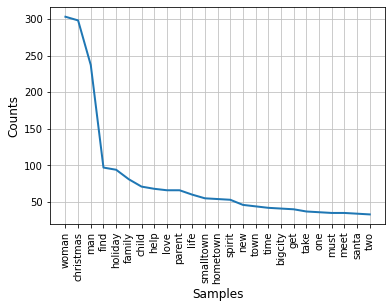

In [ ]:
fdist1 = FreqDist(text_clean_withstopwords)
fdist1.plot(25)

In [ ]:
# remove woman christmas man find holiday - generic terms

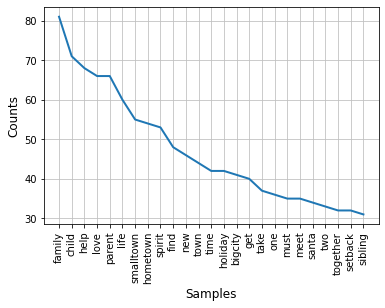

In [ ]:
text_clean_withoutstopwords = basic_clean2(plots_string)
fdist2 = FreqDist(text_clean_withoutstopwords)
fdist2.plot(25)

In [ ]:
import pandas as pd
bigrams = (pd.Series(nltk.ngrams(text_clean_withoutstopwords, 2)).value_counts())[:25]

In [ ]:
bigrams

(return, hometown)      11
(fall, love)            11
(high, school)          11
(true, meaning)          8
(department, store)      7
(school, sweetheart)     7
(true, love)             6
(best, friend)           6
(work, together)         6
(must, decide)           6
(mr, claus)              5
(two, child)             5
(young, child)           5
(falling, love)          5
(first, time)            5
(hometown, holiday)      5
(stranded, mixup)        5
(important, life)        4
(spend, time)            4
(niece, nephew)          4
(must, work)             4
(shop, owner)            4
(back, hometown)         4
(along, way)             4
(love, life)             4
dtype: int64

In [ ]:
trigrams = (pd.Series(nltk.ngrams(text_clean_withoutstopwords, 3)).value_counts())[:20]

In [ ]:
trigrams

(high, school, sweetheart)       7
(first, time, since)             3
(old, high, school)              3
(department, store, santa)       2
(ice, sculpting, competition)    2
(return, hometown, two)          2
(spend, time, together)          2
(wish, come, true)               2
(real, estate, bigcorp)          2
(thing, get, complicated)        2
(take, unexpected, turn)         2
(miracle, really, happen)        2
(recently, divorced, setback)    2
(annual, ice, sculpting)         2
(unexpectedly, fall, love)       2
(hometown, first, time)          2
(make, end, meet)                2
(reconnects, high, school)       2
(get, stranded, mixup)           2
(find, stranded, mixup)          2
dtype: int64

Text(0.5, 1.0, 'Hallmark Xmas Movie Bigrams')

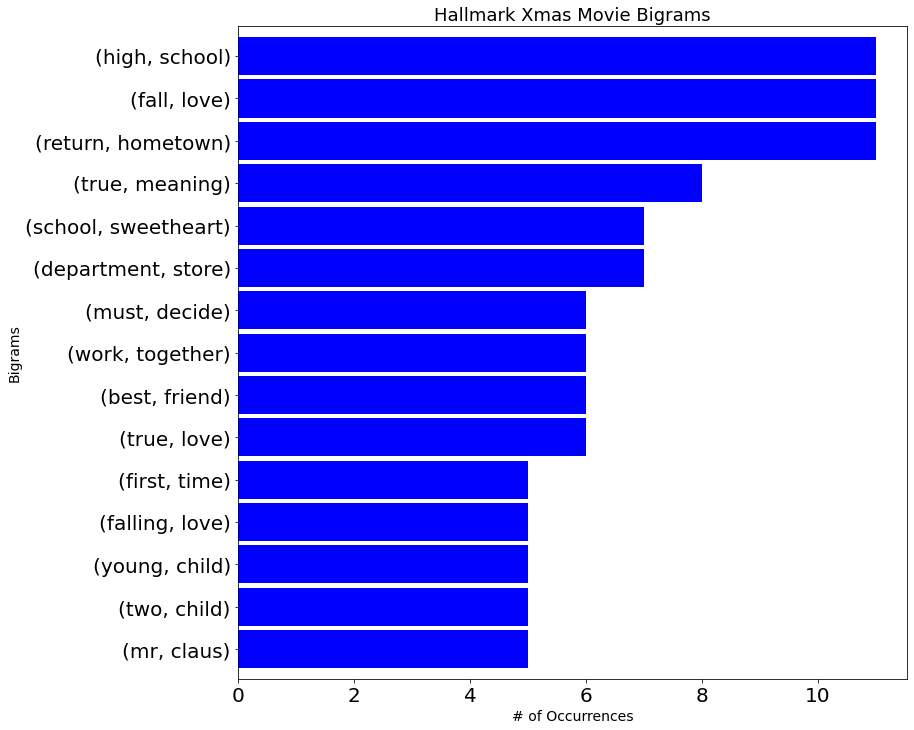

In [ ]:
bigrams[:15].sort_values().plot.barh(color='blue',
                                    width=.9, figsize=(12,12))
plt.rcParams.update({'axes.labelsize' : 'large'})
plt.ylabel('Bigrams', fontsize=14)
plt.xlabel('# of Occurrences', fontsize=14)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Hallmark Xmas Movie Bigrams', fontsize=18)

Text(0.5, 1.0, 'Hallmark Xmas Movie Trigrams')

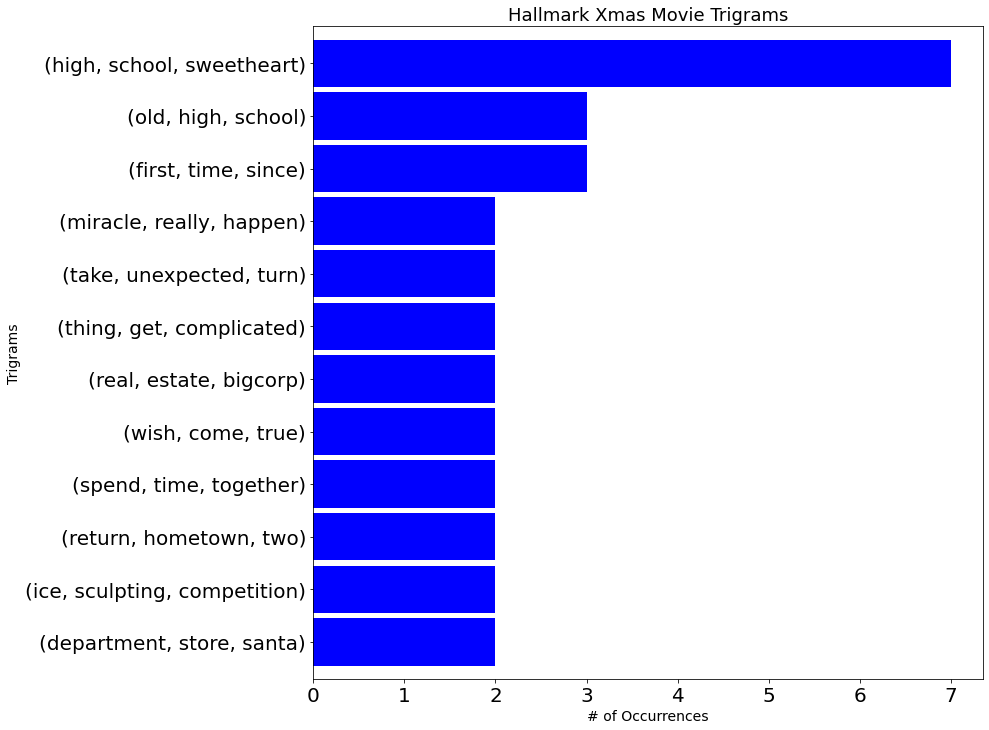

In [ ]:
trigrams[:12].sort_values().plot.barh(color='blue',
                                    width=.9, figsize=(12,12))
plt.rcParams.update({'axes.labelsize' : 'large'})
plt.ylabel('Trigrams', fontsize=14)
plt.xlabel('# of Occurrences', fontsize=14)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Hallmark Xmas Movie Trigrams', fontsize=18)

In [ ]:
# now lets try topics

In [ ]:
text = text_clean_withoutstopwords.copy()

In [ ]:
type(text), len(text)

(list, 7758)

In [ ]:
text[15:20]

['life', 'recurring', 'dream', 'spirit', 'treat']

In [ ]:
# plots is a list of strings with formats (each is a plot)
# loop through and use 'basic_clean' function to normalize

x = [basic_clean2(plots[i]) for i in range(0, len(plots))]

In [ ]:
# x is list of lists -- words in plots
len(x)

259

In [ ]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(x)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in x]

In [ ]:
Lda = gensim.models.ldamodel.LdaModel

In [ ]:
#fit model to matrix for 8 topics
ldamodel = Lda(doc_term_matrix, num_topics=8, id2word=dictionary, passes=100)

In [ ]:
for idx, topic in ldamodel.print_topics(-1):
  print('Topics: {}  Words: {}'.format(idx, topic))

Topics: 0  Words: 0.009*"get" + 0.009*"hometown" + 0.007*"spirit" + 0.007*"setback" + 0.006*"young" + 0.006*"take" + 0.006*"must" + 0.006*"romance" + 0.006*"new" + 0.005*"grandparent"
Topics: 1  Words: 0.014*"help" + 0.011*"love" + 0.008*"plan" + 0.008*"child" + 0.007*"life" + 0.007*"time" + 0.007*"family" + 0.006*"new" + 0.006*"party" + 0.005*"true"
Topics: 2  Words: 0.009*"life" + 0.008*"help" + 0.008*"spirit" + 0.008*"holiday" + 0.007*"find" + 0.007*"bigcity" + 0.007*"sibling" + 0.006*"get" + 0.006*"year" + 0.006*"time"
Topics: 3  Words: 0.009*"bigcity" + 0.008*"spirit" + 0.007*"parent" + 0.007*"life" + 0.006*"child" + 0.006*"love" + 0.006*"hometown" + 0.005*"santa" + 0.004*"altlife" + 0.004*"show"
Topics: 4  Words: 0.011*"parent" + 0.009*"smalltown" + 0.008*"family" + 0.008*"new" + 0.007*"find" + 0.007*"familybiz" + 0.007*"takeover" + 0.007*"town" + 0.007*"bigcorp" + 0.006*"love"
Topics: 5  Words: 0.011*"child" + 0.008*"parent" + 0.006*"love" + 0.006*"work" + 0.006*"family" + 0.006

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 13.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=66b4581b12b309328085e29fcc36efb457c4eb3387f98eb5ef5f5e17006ca79f
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.076277  0.001369       1        1  19.670885
5      0.042845  0.092465       2        1  14.933715
1      0.032450 -0.077355       3        1  12.077949
4      0.084761  0.014991       4        1  11.554794
6     -0.114015  0.031550       5        1  10.741190
3     -0.054361  0.063942       6        1  10.450058
0     -0.032606 -0.088060       7        1  10.358800
2     -0.035352 -0.038902       8        1  10.212609, topic_info=             Term       Freq      Total Category  logprob  loglift
1157    familybiz  14.000000  14.000000  Default  30.0000  30.0000
1164     takeover  14.000000  14.000000  Default  29.0000  29.0000
255          plan  23.000000  23.000000  Default  28.0000  28.0000
301   grandparent   7.000000   7.000000  Default  27.0000  27.0000
199      hometown  40.000000  40.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
629       setback   2.905684  24.595500   Topic8  -5.6083   0.1457
269      together   2.905720  25.003532   Topic8  -5.6083   0.1292
205        parent   2.905625  50.157709   Topic8  -5.6083  -0.5670
514        former   2.256138  10.267852   Topic8  -5.8613   0.7662
147        school   2.267091  18.334178   Topic8  -5.8564   0.1913

[609 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1684      6  0.350097       12
1684      8  0.350097       12
714       5  0.692412    aaron
174       5  0.921093      act
1556      6  0.350098  actress
...     ...       ...      ...
91        3  0.131372    young
91        4  0.087581    young
91        5  0.131372    young
91        6  0.175162    young
91        7  0.218953    young

[1181 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 2, 5, 7, 4, 1, 3])

In [ ]:
#fit model to matrix for 5 topics
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word=dictionary, passes=100)

In [ ]:
for idx, topic in ldamodel.print_topics(num_words=5):
  print('Topics: {}  Words: {}'.format(idx, topic))

Topics: 0  Words: 0.011*"love" + 0.008*"family" + 0.008*"help" + 0.006*"must" + 0.005*"santa"
Topics: 1  Words: 0.010*"child" + 0.009*"parent" + 0.007*"help" + 0.007*"hometown" + 0.007*"family"
Topics: 2  Words: 0.013*"town" + 0.006*"smalltown" + 0.006*"help" + 0.005*"hometown" + 0.005*"parent"
Topics: 3  Words: 0.010*"life" + 0.009*"family" + 0.008*"love" + 0.008*"child" + 0.008*"spirit"
Topics: 4  Words: 0.012*"family" + 0.009*"smalltown" + 0.007*"santa" + 0.007*"parent" + 0.006*"help"


In [ ]:
#fit model to matrix for 3 topics
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word=dictionary, passes=100)

In [ ]:
for idx, topic in ldamodel.print_topics(num_words=5):
  print('Topics: {}  Words: {}'.format(idx, topic))

Topics: 0  Words: 0.008*"life" + 0.006*"help" + 0.006*"town" + 0.006*"hometown" + 0.006*"love"
Topics: 1  Words: 0.009*"parent" + 0.008*"child" + 0.008*"hometown" + 0.007*"help" + 0.007*"family"
Topics: 2  Words: 0.011*"family" + 0.008*"child" + 0.008*"love" + 0.007*"parent" + 0.006*"time"


In [ ]:
# 8 topics is the clearest - maybe there are 7? - let's stick w/ 8 from LDA grid search

In [ ]:
# topics:
# 1 - RIVALS - have to work together for some goal
# 2 - BOSS - cynical bizman hires spunky woman for some reason
# 3 - ALTLIFE - wish on a spirit/santa granted - or time travel
# 4 - TAKEOVER - bigcorp threatens familybiz in smalltown
# 5 - MIXUP - travel mixup forces incompatible people together
# 6 - IMPOSTER - dramatic irony - someone lies abt who they are/amnesia
# 7 - SETBACK - disappointed moves away to smalltown to heal/inherit

In [ ]:
len(plots), type(plots)

(259, list)

In [ ]:
plots[100:105]

['After starting her first job at a country club restaurant <WOMAN> passions for cooking and ice sculpting are met with romance and <CHRISTMAS> spirit when a childhood friend <MAN> enters her into the club annual <CHRISTMAS> ice sculpting competition without her knowledge.',
 'An out-of-work <SETBACK> <BIGCITY> actress returns home to the quaint <HOMETOWN> she escapedyears before and finds a place far different than the hamlet she left. She suddenly finds performing possibilities and even romance that kind of blow her away.',
 'At the height of her career investigative journalist <WOMAN> finds herself wondering what would have been had she stayed with the love of her life <MAN>years before. When <SANTA> hears her “what ifs?” as a <CHRISTMAS> wish he transports <WOMAN> to a version of her life <ALTLIFE> where she and <MAN> started a family.',
 'A successful <BIGCORP> businesswoman <WOMAN> <INHERIT> her beloved aunts inn <FAMILYBIZ> and chooses to restore the hotel to its original grande

In [ ]:
# generation: markov chain - GPT-2
!pip install markovify

     |████████████████████████████████| 245kB 12.6MB/s 
  Created wheel for markovify: filename=markovify-0.9.0-cp37-none-any.whl size=18476 sha256=d3d25fa5ed13bdf4428623fe143907a978d49d5046c99a22243b4480c12e22ea
  Stored in directory: /root/.cache/pip/wheels/03/59/5b/04c5f27d57977580c1122fa69a69c327dede5a30f9dac54c55
Successfully built markovify


In [ ]:
import markovify

In [ ]:
plots_newline = '\n'.join(plots)

In [ ]:
text_model = markovify.NewlineText(plots_newline)

In [ ]:
from IPython.display import display, HTML
def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
for i in range(5):
  print(text_model.make_sentence(), '\n')

When widowed <PARENT> <WOMAN> returns <HOMETOWN> to meet their <PARENT> are preoccupied with work and the friendly passerby a widower <MAN> is searching for a romance full of <CHRISTMAS> in the life she planned for give way to make ends meet. Stripped of power and position Drake discovers the importance of the Merry and Brights operation and find themselves falling for each other just in time to plan the event. One afternoon she meets the locals and even find time for the holidays. 

A workaholic television producer <WOMAN> receives a visit from the <BOSS> <MAN> who has lost <SETBACK> sight of the <BIGCITY> gallery world artist <WOMAN> returns back to <SMALLTOWN> Colorado to consider the location. On her way into town so she must complete the job of turning things around a determined young elf befriends a little boy with a cynical business owner <BOSS> <MAN> whose company commissioned the float. 

<WOMAN> is ending her tenure as the most unlikely of circumstances right before <CHRISTMA

In [ ]:
text_model2 = markovify.Text(plots)

In [ ]:
for i in range(5):
  print(text_model2.make_sentence(), '\n')

With a little guidance from a <BIGCORP> chain resort <TAKEOVER>. 

Could they both keep their news secret <IMPOSTER> in hopes that the <BIGCORP> buyer is her high school sweetheart <MAN> who also happens to be her date as she sees her former flame <MAN>. The two met and before long a friendship developed into romance. 

After moving back to <SMALLTOWN> Nilson Bay she meets a beautiful veterinary student who challenges his decision to remain a confirmed bachelor. 

The board assigns him what seems like an impossible mission: he must reconcile with their <CHILD> who soon shares her love of <CHRISTMAS> while opening themselves up for a holiday festival. 

<WOMAN> is so fed up with a variety of characters. 



In [ ]:
# next step is to tag plot types and train GPT2 - try generating new for each

In [ ]:
# code to use is in Copy of Copy of BuildMoviePlots

In [ ]:
plots[145:148]

['When <WOMAN> takes a rare break from work for her friend Avas <CHRISTMAS> wedding she reconnects with her former flame <MAN>. The two decorate the cottage where the newlyweds will spend their honeymoon – a cottage said to bring true love to anyone who stays there – and feel their chemistry return.',
 '<WOMAN> now 30 years old and considered a relic in the world of figure skating gets an improbable shot to reclaim skating glory when a young coach <MAN> sees greatness in her. Together they find their love of skating goes beyond the ice.',
 '<WOMAN> a veterinarian in <SMALLTOWN> reluctantly will spend <CHRISTMAS> with her long-distance <OTHERMAN>. Bound for the airport she has engine trouble <MIXUP> and <MAN> headed to Florida with his <CHILD> Zoe stops to help. Sure they won’t meet again they ignore their attraction and part ways. At the diner <WOMAN> wishes on a snow globe <ALTLIFE> and a storm <SPIRIT> seems to grant her wish.']

In [ ]:
# need to revisit the stories - I think coach=boss; rivals=exes